# Pra UAS

# Pendahuluan

Diabetes adalah salah satu penyakit kronis paling umum dan mematikan di seluruh dunia, yang memicu komplikasi serius seperti penyakit jantung, stroke, gagal ginjal, kebutaan, dan amputasi. Permasalahan utamanya adalah seringnya diabetes terdiagnosis terlambat, ketika komplikasi sudah mulai muncul, karena gejala awal yang samar atau kurangnya kesadaran akan faktor risiko. Deteksi dini dan pemahaman mendalam tentang faktor-faktor yang berkontribusi terhadap diabetes sangat penting untuk meningkatkan peluang pengelolaan penyakit, mencegah komplikasi, dan mengurangi beban kesehatan masyarakat.

Dataset "CDC Diabetes Health Indicators" bertujuan untuk mengatasi masalah ini dengan menyediakan data komprehensif mengenai indikator kesehatan dan gaya hidup, memungkinkan identifikasi dini individu berisiko tinggi dan pemahaman pola-pola yang berkaitan dengan prevalensi diabetes, guna mendukung upaya pencegahan dan intervensi yang lebih efektif.

## Sumber Data

Dataset diambil dari link dibawah ini:

https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

## Integrasi Data

untuk mengambil data agar dapat diolah, perlu untuk menginstall package yang telah disediakan oleh UCI Dataset. Instalasi dilakukan berguna untuk menarik data yang berasal dari UCI dataset agar dapat diolah. peritah untuk mengambil data dari UCI dataset dapat di lihat ketika menekan tombol import in python pada datase yang diinginkan dan ikuti perintah tersebut agar data dapat diambil dari UCI dataset. Contoh pengambilan data dari UCI dataset dapat dilihat pada gambar dan perintah berikut:

In [ ]:
pip install ucimlrepo

# Analisis Diabetes menggunakan BRFSS 2015
Notebook ini mencakup:

1. Data Understanding
2. Explorasi Data & Visualisasi
3. Preprocessing
4. Modeling (Random Forest)
5. Evaluasi Model

Dataset: diabetes_012_health_indicators_BRFSS2015.csv

## 1. Data Understanding
Penjelasan setiap fitur:

| Fitur | Deskripsi |
|-------|-----------|
| Diabetes_012 | Status diabetes: 0 = Tidak, 1 = Prediabetes, 2 = Diabetes |
| HighBP | Tekanan darah tinggi (1=Ya,0=Tidak) |
| HighChol | Kolesterol tinggi (1=Ya,0=Tidak) |
| CholCheck | Periksa kolesterol 5 tahun terakhir (1=Ya,0=Tidak) |
| BMI | Body Mass Index |
| Smoker | Merokok 100 batang (1=Ya,0=Tidak) |
| Stroke | Pernah stroke (1=Ya,0=Tidak) |
| HeartDiseaseorAttack | Penyakit jantung/serangan (1=Ya,0=Tidak) |
| PhysActivity | Aktivitas fisik 30 hari (1=Ya,0=Tidak) |
| Fruits | Konsumsi buah harian (1=Ya,0=Tidak) |
| Veggies | Konsumsi sayur harian (1=Ya,0=Tidak) |
| HvyAlcoholConsump | Alkohol berlebih (1=Ya,0=Tidak) |
| AnyHealthcare | Akses layanan kesehatan (1=Ya,0=Tidak) |
| NoDocbcCost | Tidak periksa dokter karena biaya (1=Ya,0=Tidak) |
| GenHlth | Kesehatan umum (1=Sangat Baik ... 5=Sangat Buruk) |
| MentHlth | Hari tidak sehat mental (0-30) |
| PhysHlth | Hari tidak sehat fisik (0-30) |
| DiffWalk | Kesulitan berjalan (1=Ya,0=Tidak) |
| Sex | Jenis kelamin (1=Pria,0=Wanita) |
| Age | Kelompok umur (1=18-24 ... 13=>80) |
| Education | Pendidikan (1=Tidak sekolah ...6=Pascasarjana) |
| Income | Pendapatan (1=<10K ...8=>75K) |

In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving diabetes_012_health_indicators_BRFSS2015.csv to diabetes_012_health_indicators_BRFSS2015.csv
User uploaded file "diabetes_012_health_indicators_BRFSS2015.csv" with length 22738151 bytes


In [5]:
import pandas as pd

df = pd.read_csv('/content/diabetes_012_health_indicators_BRFSS2015.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

## 2. Explorasi Data & Visualisasi
### 2.1 Distribusi Target

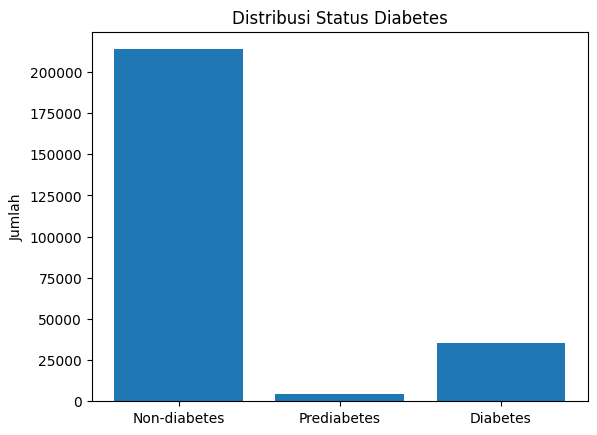

In [6]:
import matplotlib.pyplot as plt

counts = df['Diabetes_012'].value_counts().sort_index()
plt.figure()
plt.bar(counts.index, counts.values)
plt.xticks([0,1,2], ['Non-diabetes','Prediabetes','Diabetes'])
plt.title('Distribusi Status Diabetes')
plt.ylabel('Jumlah')
plt.show()

### 2.2 Deteksi Outlier (Boxplot)

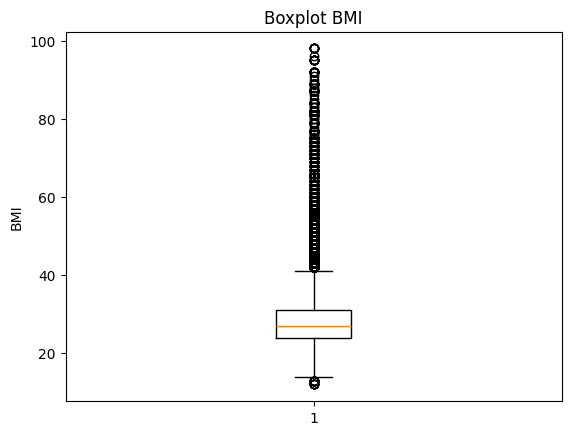

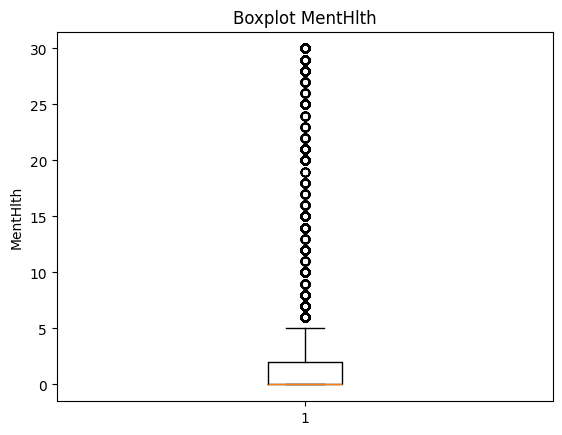

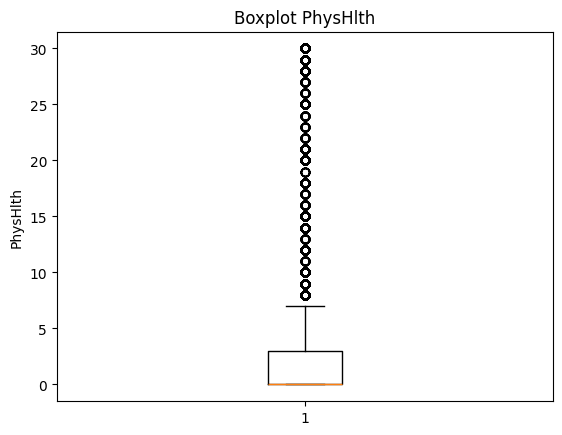

In [7]:
import matplotlib.pyplot as plt

features = ['BMI','MentHlth','PhysHlth']
for feat in features:
    plt.figure()
    plt.boxplot(df[feat])
    plt.title(f'Boxplot {feat}')
    plt.ylabel(feat)
    plt.show()

### 2.3 Korelasi Antar Fitur

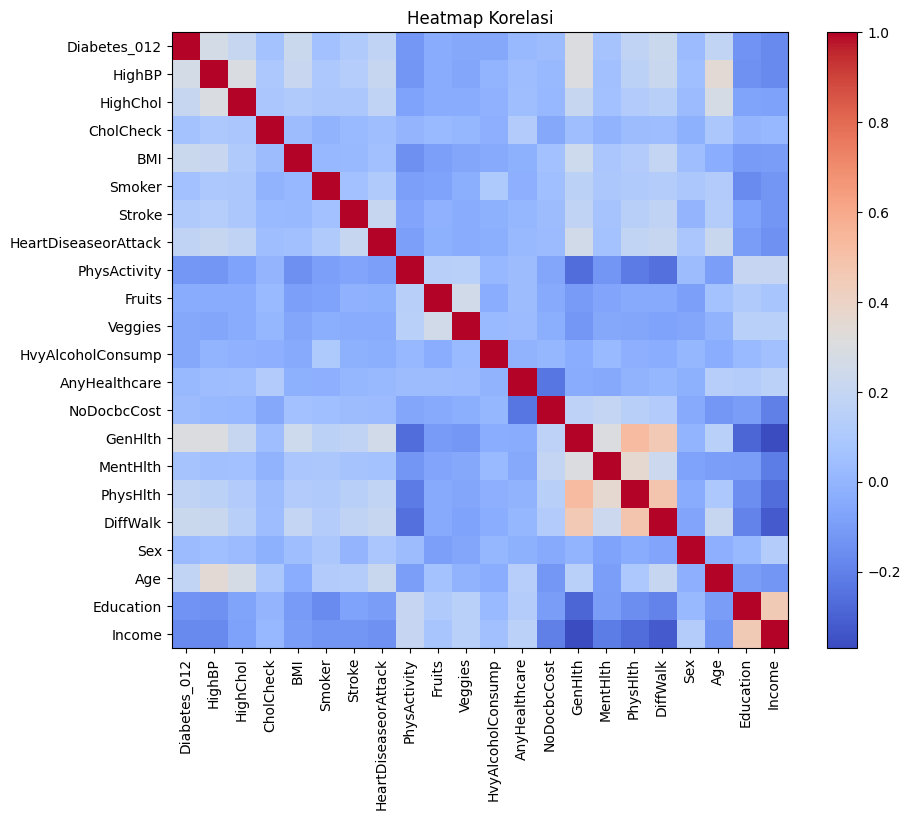

In [8]:
import matplotlib.pyplot as plt

corr = df.corr()
plt.figure(figsize=(10,8))
plt.imshow(corr, aspect='equal', cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title('Heatmap Korelasi')
plt.show()

## 3. Preprocessing
- Normalisasi fitur numerik (StandardScaler)
- Split data train & test (80/20)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 4. Modeling
Klasifikasi menggunakan Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     42795
         1.0       0.00      0.00      0.00       944
         2.0       0.47      0.20      0.28      6997

    accuracy                           0.84     50736
   macro avg       0.44      0.39      0.40     50736
weighted avg       0.79      0.84      0.81     50736

Confusion Matrix:
 [[41294    31  1470]
 [  845     0    99]
 [ 5610     7  1380]]
